### UNDERSTANDING THE MNIST DATASET

+ MNIST is the Handwritten digit Dataset.

+ In the dataset, each image is represented by the digit it represents.

+ The mnist keys contain, 
     
    + data 
    + target 
    + feature_names 
    + DESCR 
    + details 
    + categories 
    + urls

+ The data contain 70000 images.

+ And each images has 784 features.

+ That means, 28 pixel * 28 pixel = 784 pixels per image.

+ Here training the Binary CLassifier.

+ that means that, one class or other.

+ Here Classifying one class = 5, and other class = not 5

+ Setting the labes and parameter like this.

+ For making the Classification.

In [32]:
import pandas as pd
import numpy as np
import sklearn

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name = "mnist_784")
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
mnist.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
mnist.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [10]:
mnist.frame

In [11]:
mnist.categories

{}

In [13]:
#mnist.feature_names

In [14]:
mnist.target_names

['class']

In [15]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [16]:
mnist.details

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'description_version': '1',
 'format': 'ARFF',
 'creator': ['Yann LeCun', 'Corinna Cortes', 'Christopher J.C. Burges'],
 'upload_date': '2014-09-29T03:28:38',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/52667/mnist_784.arff',
 'parquet_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'minio_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:12:09',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

In [18]:
mnist.url

'https://www.openml.org/d/554'

In [19]:
## length of the data from mnist
len(mnist["data"])

70000

### VISUALIZE THE DATA

In [20]:
X = mnist["data"]
y = mnist["target"]

In [21]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [28]:
## since the y is comes as objects.
## converting the y to the floats.
y = y.astype("float")
y  ## now y is floats.

array([5., 0., 4., ..., 4., 5., 6.])

In [29]:
## shape of X and y 
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [31]:
## checking the X and y for a random 56789 value.
print(X[56789])
print(y[56789])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.  13. 118. 118. 118.  16.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  80. 198. 237. 254. 254. 254. 238. 127.  98.  90.   0.   0.   0.   0.
   0. 

VISUALIZATION FUNCTION

In [33]:
def visualize_the_digit(n):
    """ The digit n is the any number between 0 and 70000.
    
    param n :- n is the number that represents from the minst["data"]
    return the image of the number represented by the number given in the param.
    """
    plt.imshow(X[n].reshape(28,28))
    return

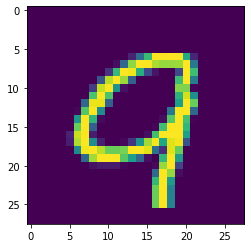

In [34]:
visualize_the_digit(3000)

In [35]:
## here the X[3000] = y[3000]
print(X[3000])
print(y[3000])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  25.
  91. 174. 254. 254. 255. 254. 156.  27.   0.   0.   0.   0.   0.   0.
   0. 

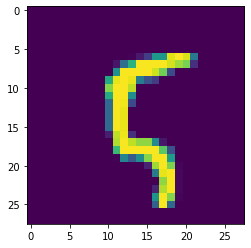

In [36]:
visualize_the_digit(100)

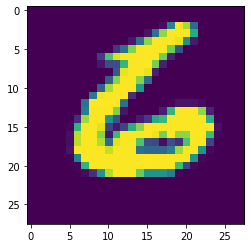

In [37]:
visualize_the_digit(69999)

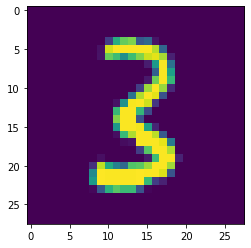

In [38]:
visualize_the_digit(50000)

LOCATING THE NUMBER 4 AND PLOT THE IMAGE

In [43]:
y[69987]

4.0

In [49]:
y == 4
np.where(y == 4)

(array([    2,     9,    20, ..., 69977, 69987, 69997], dtype=int64),)

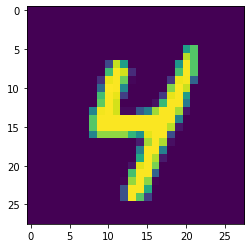

In [50]:
X_value = X[69987]
image = X_value.reshape(28,28)
plt.imshow(image);